In [61]:
!pip install psutil
from google.colab import drive
import urllib.request
import time
import bs4
import concurrent.futures
import requests
import threading
import _thread
import multiprocessing
import psutil
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Upload the following datasets in your google drive and update the coressponding paths.

1.   [wikipedia_urls](https://drive.google.com/file/d/1MhnanOUu8gGd_NpkwLGzZFLZ8KezfcOt/view?usp=share_link)
2.   [positive_words](https://drive.google.com/file/d/1eIavTxcKx73jOQbZc_-zNxf61zUk8xgD/view?usp=share_link)
3. [negative_words](https://drive.google.com/file/d/1sOA5H9CZeXsXWkAOlYaufnYAn_55mpmg/view?usp=share_link)



A dummy sentiment analysis that is based on the number of positive vs. negative words.

In [62]:
wikipedia_urls_path = "gdrive/My Drive/Lessons/Cloud Infrastructure Management/Exercise/wikipedia_urls.txt"
positive_words_path = "gdrive/My Drive/Lessons/Cloud Infrastructure Management/Exercise/positive_words.txt"
negative_words_path = "gdrive/My Drive/Lessons/Cloud Infrastructure Management/Exercise/negative_words.txt"
file = open(wikipedia_urls_path, "r")
file_content = file.read()
articles_urls = file_content.split('\n')

def article_scraper (url):
  response = requests.get(url)
  if response is not None:
    html = bs4.BeautifulSoup(response.text, 'html.parser')
    title = html.select("#firstHeading")[0].text
    paragraphs = html.select("p")
    textual_data = " " .join([ para.text for para in paragraphs[0:5]])
  return textual_data.split(" ")

def pos_neg_words( path_pos, path_neg):
  file_pos = open(path_pos, "r")
  file_pos_content = file_pos.read()
  lpositive_words = file_pos_content.split('\n')
  file_neg = open(path_neg, "r")
  file_neg_content = file_neg.read()
  lnegative_words = file_neg_content.split('\n')
  return lpositive_words, lnegative_words

def article_sentiment_analysis(num_article):
  lpos_words, lneg_words = pos_neg_words(positive_words_path,negative_words_path)
  article_words = article_scraper(articles_urls[num_article])
  spos_words , sneg_words, sarticle_words = set(lpos_words), set(lneg_words), set(article_words)
  num_pos_words = len(spos_words.intersection(sarticle_words))
  num_neg_words = len(sneg_words.intersection(sarticle_words))
  #print(num_pos_words,num_neg_words, end=" ")
  if num_pos_words == num_neg_words or num_pos_words +1 == num_neg_words or num_pos_words == num_neg_words +1: return articles_urls[num_article].split("/")[-1], "neutral"
  return (articles_urls[num_article].split("/")[-1], "positive") if num_pos_words > num_neg_words else (articles_urls[num_article].split("/")[-1], "negative")

In [63]:
def monitor_CPU_Ram():
  mem = psutil.virtual_memory()
  print("{}: Memory: {} CPU: {}".format(time.ctime(time.time()),mem.percent,psutil.cpu_percent(interval=1.0, percpu=True)))

In [64]:
mem = psutil.virtual_memory()
print("Nuber of CPUs: ", psutil.cpu_count(), " Total physical memory", str(int(mem.total/1024**2)), "MB")
start_time = time.time()
for i in range(100):
  print  ("%s : %s" % article_sentiment_analysis(i))
  monitor_CPU_Ram()
print("Execution time: ",str((time.time() - start_time)))

Nuber of CPUs:  2  Total physical memory 12978 MB
Wiki : positive
Thu Jan 25 19:19:08 2024: Memory: 10.5 CPU: [100.0, 100.0]
Facebook : negative
Thu Jan 25 19:19:15 2024: Memory: 11.6 CPU: [22.7, 25.3]
YouTube : negative
Thu Jan 25 19:19:19 2024: Memory: 11.8 CPU: [17.2, 14.3]
United_States : neutral
Thu Jan 25 19:19:21 2024: Memory: 11.9 CPU: [3.0, 4.0]
Donald_Trump : negative
Thu Jan 25 19:19:25 2024: Memory: 11.9 CPU: [2.0, 3.0]
Wikipedia : positive
Thu Jan 25 19:19:27 2024: Memory: 11.9 CPU: [3.0, 2.0]
Barack_Obama : neutral
Thu Jan 25 19:19:31 2024: Memory: 11.9 CPU: [54.6, 58.4]
India : neutral
Thu Jan 25 19:19:34 2024: Memory: 11.8 CPU: [3.0, 3.0]
Elizabeth_II : positive
Thu Jan 25 19:19:36 2024: Memory: 11.8 CPU: [3.0, 3.0]
World_War_II : neutral
Thu Jan 25 19:19:38 2024: Memory: 11.8 CPU: [5.0, 3.0]
Michael_Jackson : negative
Thu Jan 25 19:19:41 2024: Memory: 11.8 CPU: [4.0, 4.0]
United_Kingdom : neutral
Thu Jan 25 19:19:45 2024: Memory: 11.8 CPU: [21.2, 32.3]
Lady_Gaga : posi

In [65]:
import time
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry


In [66]:
def measure_latency(url):
    start_time = time.time()
    response = requests.get(url)
    latency = time.time() - start_time
    return latency

def measure_resource_utilization():
    mem = psutil.virtual_memory()
    cpu_percentages = psutil.cpu_percent(interval=1.0, percpu=True)
    return mem.percent, cpu_percentages


In [67]:
def article_sentiment_analysis(num_article):
    lpos_words, lneg_words = pos_neg_words(positive_words_path, negative_words_path)
    article_words = article_scraper(articles_urls[num_article])
    spos_words, sneg_words, sarticle_words = set(lpos_words), set(lneg_words), set(article_words)
    num_pos_words = len(spos_words.intersection(sarticle_words))
    num_neg_words = len(sneg_words.intersection(sarticle_words))

    latency = measure_latency(articles_urls[num_article])
    mem_percent, cpu_percentages = measure_resource_utilization()

    if num_pos_words == num_neg_words or num_pos_words + 1 == num_neg_words or num_pos_words == num_neg_words + 1:
        sentiment = "neutral"
    else:
        sentiment = "positive" if num_pos_words > num_neg_words else "negative"

    return articles_urls[num_article].split("/")[-1], sentiment, latency, mem_percent, cpu_percentages


In [55]:
start_time = time.time()
results = []

for i in range(100):
    result = article_sentiment_analysis(i)
    results.append(result)
    print(result)
    monitor_CPU_Ram()

print("Execution time: ", str((time.time() - start_time)))


('Wiki', 'positive', 0.33797168731689453, 12.1, [54.1, 56.4])
Thu Jan 25 18:51:39 2024: Memory: 12.1 CPU: [23.0, 32.0]
('Facebook', 'negative', 0.2959904670715332, 12.1, [3.0, 3.0])
Thu Jan 25 18:51:43 2024: Memory: 12.1 CPU: [3.0, 2.0]
('YouTube', 'negative', 0.2673320770263672, 12.1, [2.0, 3.0])
Thu Jan 25 18:51:47 2024: Memory: 12.1 CPU: [4.0, 3.0]
('United_States', 'neutral', 0.32163262367248535, 11.9, [59.0, 51.0])
Thu Jan 25 18:51:51 2024: Memory: 12.1 CPU: [42.4, 50.0]
('Donald_Trump', 'negative', 0.29621243476867676, 11.6, [21.0, 21.0])
Thu Jan 25 18:51:55 2024: Memory: 11.6 CPU: [47.0, 42.4]
('Wikipedia', 'positive', 0.29305434226989746, 11.6, [1.0, 3.0])
Thu Jan 25 18:51:59 2024: Memory: 11.6 CPU: [3.0, 3.0]
('Barack_Obama', 'neutral', 0.3618743419647217, 11.8, [70.0, 42.4])
Thu Jan 25 18:52:03 2024: Memory: 11.9 CPU: [47.0, 25.3]
('India', 'neutral', 0.29940152168273926, 11.9, [14.1, 15.0])
Thu Jan 25 18:52:07 2024: Memory: 11.9 CPU: [84.2, 92.9]
('Elizabeth_II', 'positive',

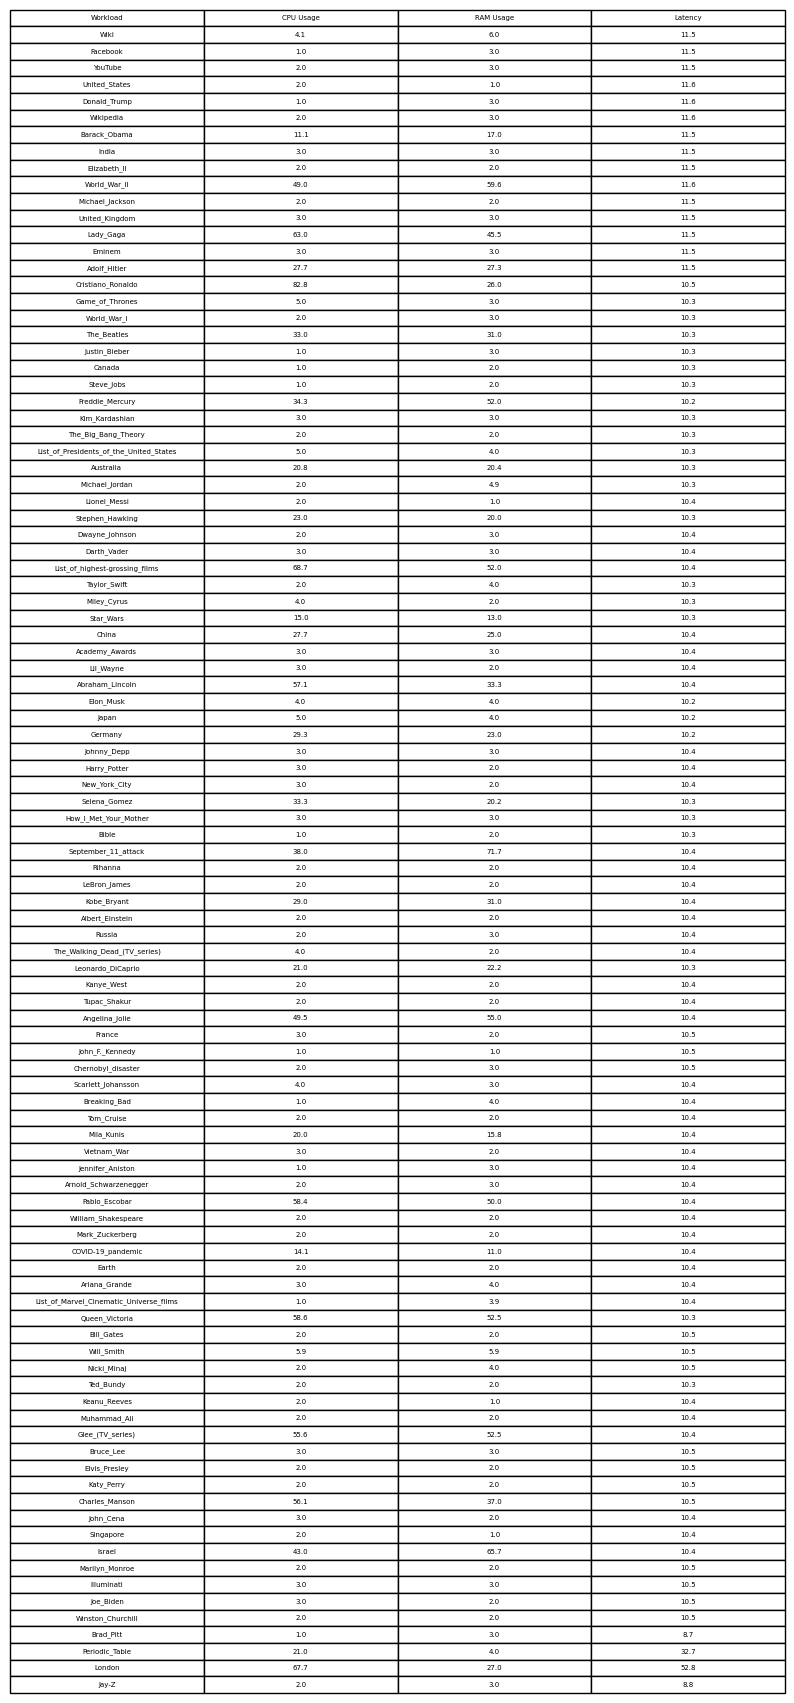

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract data for creating a DataFrame
data = {'Workload': [result[0] for result in results],
        'CPU Usage': [result[4][0] for result in results],
        'RAM Usage': [result[4][1] for result in results],
        'Latency': [result[3] for result in results]}

df = pd.DataFrame(data)

# Constructing the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center')

plt.show()


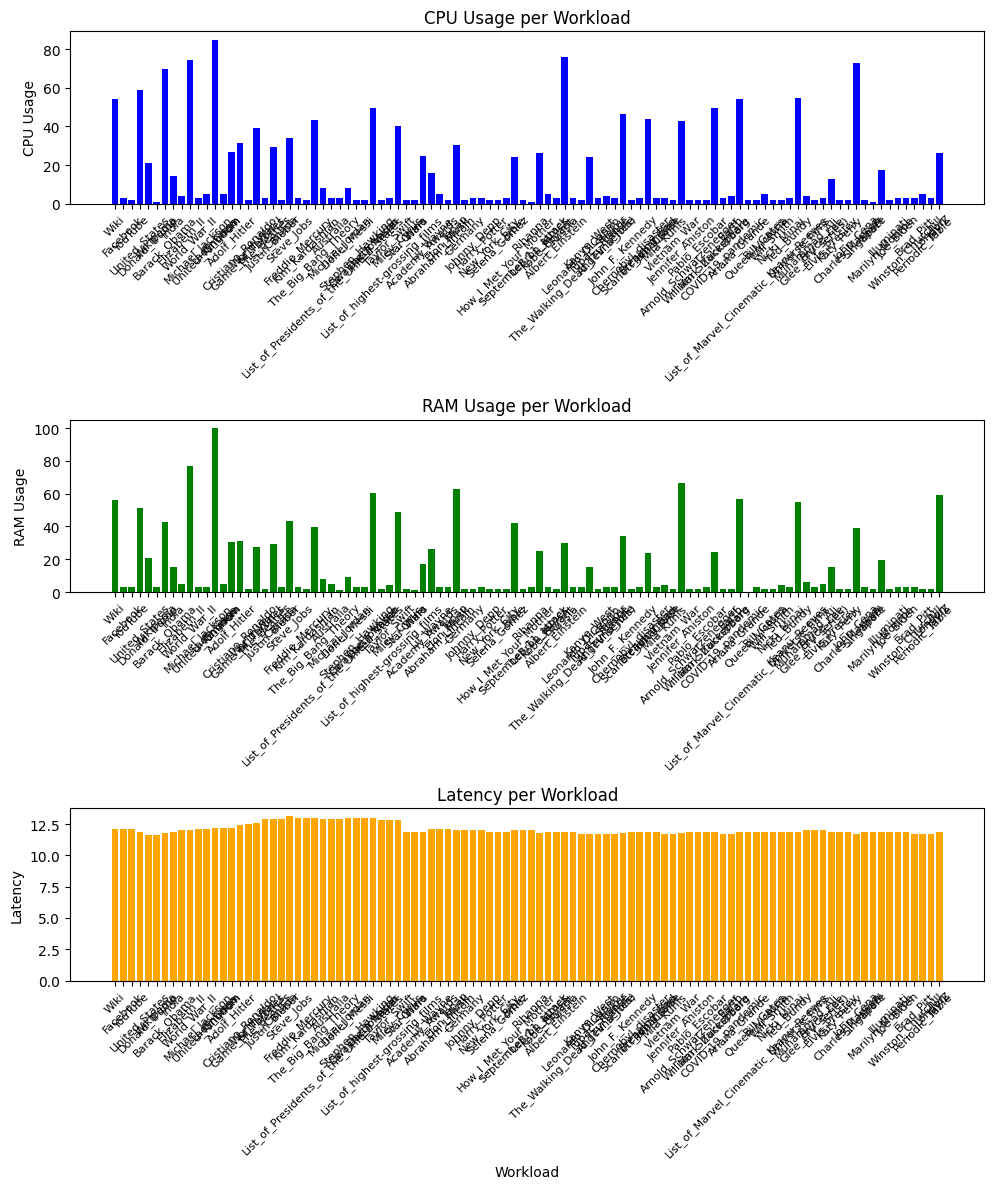

In [59]:
import matplotlib.pyplot as plt

# Extract data for graphs
workloads = [result[0] for result in results]
cpu_usage = [result[4][0] for result in results]
ram_usage = [result[4][1] for result in results]
latency = [result[3] for result in results]

# Constructing the graph
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Graph for CPU Usage
axes[0].bar(workloads, cpu_usage, color='blue')
axes[0].set_ylabel('CPU Usage')
axes[0].set_title('CPU Usage per Workload')
axes[0].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels for better readability

# Graph for RAM Usage
axes[1].bar(workloads, ram_usage, color='green')
axes[1].set_ylabel('RAM Usage')
axes[1].set_title('RAM Usage per Workload')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels for better readability

# Graph for Latency
axes[2].bar(workloads, latency, color='orange')
axes[2].set_xlabel('Workload')
axes[2].set_ylabel('Latency')
axes[2].set_title('Latency per Workload')
axes[2].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()
